In [3]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

In [4]:
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [5]:
covid_data.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
276,Unknown,China,2020-03-17T11:53:10,0,0,0,NaN,NaN
277,NaN,Kiribati,2020-03-17T11:53:10,0,0,0,-3.3704,-168.7340
278,NaN,Palau,2020-03-17T11:53:10,0,0,0,7.5150,134.5825
279,Cook Islands,New Zealand,2020-03-17T11:53:10,0,0,0,-21.2367,-159.7777
280,NaN,Summer Olympics 2020,2020-03-17T11:53:10,0,0,0,35.6491,139.7737


In [8]:
covid_data['Country/Region'].nunique()

162

In [9]:
covid_data['Country/Region'].value_counts().head(10)

US                56
China             34
Canada            11
Australia          9
France             8
United Kingdom     4
New Zealand        2
Netherlands        2
Denmark            2
Tanzania           1
Name: Country/Region, dtype: int64

## 1. Get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus Country wise

In [10]:
covid_data.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
#we do not have active cases, so let us calculate the same

In [12]:
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']

In [13]:
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166


In [19]:
country_wise = covid_data.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']].sum()
country_wise.head()

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,20,0,1,19
Albania,55,1,0,54
Algeria,60,4,12,44
Andorra,39,0,1,38
Antigua and Barbuda,1,0,0,1


In [24]:
country_wise.sort_values('Active',ascending=False).head(25)

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Italy,31506,2503,2941,26062
Spain,11748,533,1028,10187
Iran,16169,988,5389,9792
Germany,9257,24,67,9166
China,81058,3230,68798,9030
France,7683,148,12,7523
"Korea, South",8320,81,1407,6832
US,6421,108,17,6296
Switzerland,2700,27,4,2669


## 2. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise

In [53]:
country_province_wise = covid_data.groupby(['Country/Region','Province/State'])[['Deaths']].sum()
country_province_wise.head(25)

Deaths
Country/Region Province/State                      
Australia      Australian Capital Territory       0
               From Diamond Princess              0
               New South Wales                    4
               Northern Territory                 0
               Queensland                         0
               South Australia                    0
               Tasmania                           0
               Victoria                           0
               Western Australia                  1
Canada         Alberta                            0
               British Columbia                   4
               Grand Princess                     0
               Manitoba                           0
               New Brunswick                      0
               Newfoundland and Labrador          0
               Nova Scotia                        0
               Ontario                            1
               Prince Edward Island               0
               Quebec                             1
               Saskatchewan                       0
China          Anhui                              6
               Beijing                            8
               Chongqing                          6
               Fujian                             1
               Gansu                              2

## 3. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19).

In [51]:
(covid_data[covid_data['Country/Region'] == 'China'].groupby('Province/State')[['Confirmed','Deaths','Recovered']].sum()).sort_values('Confirmed', ascending = False)

,Confirmed,Deaths,Recovered
Province/State,,,
Hubei,67799,3111,56003
Guangdong,1364,8,1307
Henan,1273,22,1250
Zhejiang,1232,1,1216
Hunan,1018,4,1014
Anhui,990,6,984
Jiangxi,935,1,934
Shandong,761,7,746
Jiangsu,631,0,631


## 4. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [58]:
(covid_data.groupby('Country/Region')[['Deaths']].sum().reset_index()).sort_values('Deaths',ascending =False).reset_index(drop=True)

,Country/Region,Deaths
0,China,3230
1,Italy,2503
2,Iran,988
3,Spain,533
4,France,148
...,...,...
157,Greenland,0
158,Ghana,0
159,Georgia,0
160,Gabon,0


## 5. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered

In [61]:
covid_data[covid_data['Recovered'] == 0].reset_index(drop=True)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,New York,US,2020-03-17T22:53:03,1706,13,0,42.1657,-74.9481,1693
1,NaN,Slovenia,2020-03-17T16:53:04,275,1,0,46.1512,14.9955,274
2,NaN,Iceland,2020-03-17T15:33:06,220,1,0,64.9631,-19.0208,219
3,Florida,US,2020-03-17T23:33:02,216,6,0,27.7663,-81.6868,210
4,NaN,Chile,2020-03-17T15:33:06,201,0,0,-35.6751,-71.5430,201
...,...,...,...,...,...,...,...,...,...
152,Unknown,China,2020-03-17T11:53:10,0,0,0,NaN,NaN,0
153,NaN,Kiribati,2020-03-17T11:53:10,0,0,0,-3.3704,-168.7340,0
154,NaN,Palau,2020-03-17T11:53:10,0,0,0,7.5150,134.5825,0
155,Cook Islands,New Zealand,2020-03-17T11:53:10,0,0,0,-21.2367,-159.7777,0


In [64]:
covid_data[covid_data['Recovered'] == 0][['Deaths','Confirmed']].reset_index(drop=True)

,Deaths,Confirmed
0,13,1706
1,1,275
2,1,220
3,6,216
4,0,201
...,...,...
152,0,0
153,0,0
154,0,0
155,0,0


## 6. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died

In [76]:
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
covid_data[covid_data['Confirmed'] == covid_data['Deaths']][covid_data['Confirmed']>0].reset_index(drop=True)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,NaN,Sudan,2020-03-14T01:13:32,1,1,0,12.8628,30.2176,0
1,Cayman Islands,United Kingdom,2020-03-16T14:53:04,1,1,0,19.3133,-81.2546,0


## 7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered

In [78]:
covid_data[covid_data['Confirmed'] == covid_data['Recovered']][covid_data['Confirmed']>0].reset_index(drop=True)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,Jiangsu,China,2020-03-15T01:53:02,631,0,631,32.9711,119.4550,0
1,Shanxi,China,2020-03-13T11:09:03,133,0,133,37.5777,112.2922,0
2,Ningxia,China,2020-03-16T14:38:45,75,0,75,37.2692,106.1655,0
3,Qinghai,China,2020-03-11T02:18:14,18,0,18,35.7452,95.9956,0
4,Tibet,China,2020-03-11T02:18:14,1,0,1,31.6927,88.0924,0
5,NaN,Nepal,2020-03-13T22:22:03,1,0,1,28.3949,84.1240,0


# !

#### We have to look country wise but above output is on province/state level

In [89]:
country_data = covid_data.groupby('Country/Region').sum()
country_data

,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
Country/Region,,,,,,
Afghanistan,20,0,1,33.9391,67.7100,19
Albania,55,1,0,41.1533,20.1683,54
Algeria,60,4,12,28.0339,1.6596,44
Andorra,39,0,1,42.5063,1.5218,38
Antigua and Barbuda,1,0,0,17.0608,-61.7964,1
...,...,...,...,...,...,...
Uruguay,29,0,0,-32.5228,-55.7658,29
Uzbekistan,10,0,0,41.3775,64.5853,10
Venezuela,33,0,0,6.4238,-66.5897,33


In [94]:
country_data[country_data['Confirmed'] == country_data['Recovered']][country_data['Confirmed'] >0]

,Confirmed
Country/Region,
Nepal,1


# <font color='red'> Bingo! </font>

## 8. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19

In [110]:
covid_data.groupby('Country/Region')[['Last Update', 'Country/Region', 'Confirmed','Deaths','Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
China,81058,3230,68798
Italy,31506,2503,2941
Iran,16169,988,5389
Spain,11748,533,1028
Germany,9257,24,67
"Korea, South",8320,81,1407
France,7683,148,12
US,6421,108,17
Switzerland,2700,27,4


## 9. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150

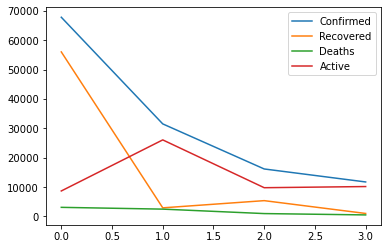

In [169]:
covid_data[covid_data['Deaths'] >= 150][['Confirmed','Recovered','Deaths','Active']].plot();

## 10. Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

In [164]:
covid_data['Country/Region'].unique()

array(['China', 'Italy', 'Iran', 'Spain', 'Germany', 'Korea, South',
       'France', 'Switzerland', 'United Kingdom', 'US', 'Netherlands',
       'Norway', 'Austria', 'Belgium', 'Sweden', 'Denmark', 'Japan',
       'Cruise Ship', 'Malaysia', 'Portugal', 'Qatar', 'Czechia',
       'Greece', 'Israel', 'Brazil', 'Finland', 'Slovenia', 'Singapore',
       'Poland', 'Pakistan', 'Bahrain', 'Estonia', 'Ireland', 'Iceland',
       'Australia', 'Chile', 'Egypt', 'Philippines', 'Canada', 'Romania',
       'Thailand', 'Indonesia', 'Saudi Arabia', 'Iraq', 'India',
       'Luxembourg', 'Kuwait', 'Lebanon', 'Peru', 'Russia', 'San Marino',
       'United Arab Emirates', 'Mexico', 'Armenia', 'Taiwan*', 'Slovakia',
       'Panama', 'Argentina', 'Bulgaria', 'Vietnam', 'Colombia',
       'Croatia', 'Serbia', 'South Africa', 'Algeria', 'Ecuador',
       'Brunei', 'Albania', 'Hungary', 'Latvia', 'Turkey', 'Cyprus',
       'Sri Lanka', 'Costa Rica', 'Andorra', 'Malta', 'Morocco',
       'Belarus', 'Georgia

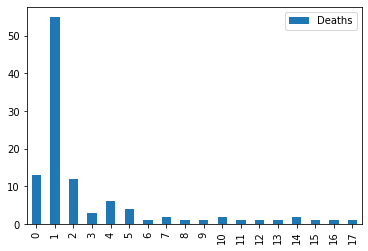

In [153]:
us_deaths = covid_data[covid_data['Country/Region'] == 'US'][covid_data['Deaths'] > 0][['Province/State','Deaths']].reset_index(drop=True)
us_deaths.plot(kind='bar')

In [150]:
import plotly.express as px

In [156]:
state_fig = px.bar(us_deaths, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

## Now let use plotly to plot question number 9

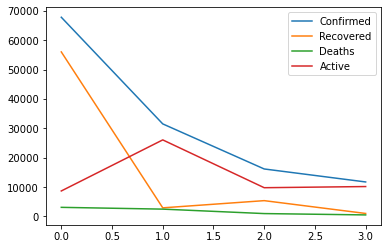

In [165]:
line_plots = covid_data[covid_data['Deaths'] >= 150][['Confirmed','Recovered','Deaths','Active']]
line_plots.plot();

In [167]:
line_plots

,Confirmed,Recovered,Deaths,Active
0,67799,56003,3111,8685
1,31506,2941,2503,26062
2,16169,5389,988,9792
3,11748,1028,533,10187


In [172]:
state_fig = px.line(line_plots)
state_fig.show()

## 11. Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

In [196]:
us_active_cases = covid_data[covid_data['Country/Region']=='US'][['Province/State','Active']]
us_active_cases

,Province/State,Active
9,New York,1693
18,Washington,1020
25,California,680
44,New Jersey,263
54,Massachusetts,217
55,Florida,210
59,Louisiana,192
69,Illinois,158
70,Colorado,158
73,Georgia,145


In [197]:
px.bar(us_active_cases, x = 'Province/State', y = 'Active', text= 'Active')

## 12.  Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA

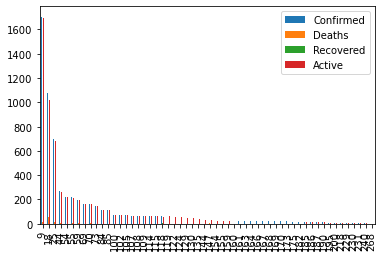

In [211]:
us_alldata = covid_data[covid_data['Country/Region'] == 'US'][['Province/State','Confirmed','Deaths','Recovered','Active']]
us_alldata.plot(kind='bar')

In [213]:
us_alldata1 = pd.melt(us_alldata, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], 
        value_name='Count', var_name='Case')
us_alldata1.head()

,Province/State,Case,Count
0,New York,Confirmed,1706
1,Washington,Confirmed,1076
2,California,Confirmed,698
3,New Jersey,Confirmed,267
4,Massachusetts,Confirmed,218


In [217]:
px.bar(us_alldata1, x='Province/State', y='Count', barmode='group', color='Case', 
       title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')

## 13. Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time

In [218]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  128 non-null    object 
 1   Country/Region  281 non-null    object 
 2   Last Update     281 non-null    object 
 3   Confirmed       281 non-null    int64  
 4   Deaths          281 non-null    int64  
 5   Recovered       281 non-null    int64  
 6   Latitude        280 non-null    float64
 7   Longitude       280 non-null    float64
 8   Active          281 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 19.9+ KB


In [225]:
cases_timeline = covid_data.groupby('Last Update')['Last Update','Confirmed'].sum()
cases_timeline.head()

,Confirmed
Last Update,
2020-03-11T02:18:14,1381
2020-03-11T20:53:02,0
2020-03-12T02:13:04,935
2020-03-13T11:09:03,451
2020-03-13T14:13:25,696


In [229]:
px.line(cases_timeline, x=cases_timeline.index, y = 'Confirmed', title = 'Number of confirmed cases over time')